In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
# For implementing Linear Regression
from sklearn.linear_model import LinearRegression

# Evaluation (to test the reliability of regression model)
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [ ]:
train = pd.read_csv('BigMart.csv')

In [ ]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.isnull().mean()

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [ ]:
train.Item_Weight.mean()

12.857645184136183

In [ ]:
from matplotlib import pyplot as plt

<Figure size 1152x1152 with 0 Axes>

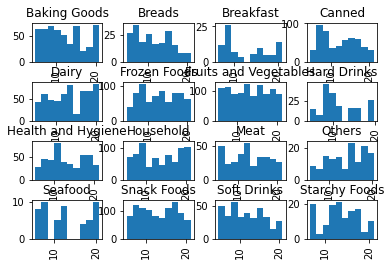

In [ ]:
plt.figure(figsize=(16,16))
train.hist('Item_Weight', by='Item_Type')
plt.show()

In [ ]:
def fill_missing(cols):
    item_type = cols[0]
    item_weight = cols[1]
    if pd.isnull(item_weight):
        return train[train.Item_Type == item_type]['Item_Weight'].mean()
    else:
        return item_weight

In [ ]:
train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Length: 8523, dtype: float64

In [ ]:
train.Item_Weight = train[['Item_Type', 'Item_Weight']].apply(fill_missing, axis=1)

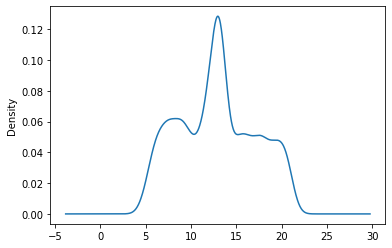

In [ ]:
train['Item_Weight'].plot(kind='kde')

In [ ]:
train.Outlet_Size

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [ ]:
train.Outlet_Size.mode()[0]

In [ ]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])

In [ ]:
train.isnull().sum()

In [ ]:
train.Item_Fat_Content.unique()

In [ ]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['low fat', 'LF'], 'Low Fat')

In [ ]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(['reg'], 'Regular')

In [ ]:
train.Item_Fat_Content.unique()

In [ ]:
train['Age'] = 2021 - train.Outlet_Establishment_Year

In [ ]:
train.head()

In [ ]:
train['Item_Visibility'].hist()

In [ ]:
train['Item_Visibility'].plot(kind='box')

In [ ]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
IQR

In [ ]:
filt_train = train[(train.Item_Visibility >= (Q1 - 1.5*IQR)) & (train.Item_Visibility <= (Q3 + 1.5*IQR))]

In [ ]:
((train.shape[0] - filt_train.shape[0])/train.shape[0])*100

In [ ]:
filt_train.shape[0]

In [ ]:
train = filt_train.copy()
train.shape

In [ ]:
train['Item_Visibility'].min(), train['Item_Visibility'].max()

In [ ]:
#creating a category
train['Item_Visibility_bins'] = pd.cut(train['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], # Creating bins for visibility
                                       labels=['Low Viz', 'Viz', 'High Viz'], include_lowest=True)   # need to specify columns, bins and labels

In [ ]:
train['Item_Visibility_bins']

0        Low Viz
1        Low Viz
2        Low Viz
3        Low Viz
4        Low Viz
          ...   
8518     Low Viz
8519     Low Viz
8520     Low Viz
8521    High Viz
8522     Low Viz
Name: Item_Visibility_bins, Length: 8523, dtype: category
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [ ]:
train['Item_Visibility_bins'].value_counts()

Low Viz     4929
Viz         2557
High Viz     903
Name: Item_Visibility_bins, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                6113 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
 12  Item_Visibility_bins       8389 non-null   category
dtypes: category(1), float64(4), int64

In [ ]:
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', \
                               'Outlet_Type', 'Item_Visibility_bins'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   object 
 1   Item_Weight                    8523 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Item_Type                      8523 non-null   object 
 4   Item_MRP                       8523 non-null   float64
 5   Outlet_Identifier              8523 non-null   object 
 6   Outlet_Establishment_Year      8523 non-null   int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   Item_Fat_Content_LF            8523 non-null   uint8  
 9   Item_Fat_Content_Low Fat       8523 non-null   uint8  
 10  Item_Fat_Content_Regular       8523 non-null   uint8  
 11  Item_Fat_Content_low fat       8523 non-null   uint8  
 12  Item_Fat_Content_reg           8523 non-null   u

In [ ]:
cols_to_drop = ['Item_Identifier', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 
                'Outlet_Establishment_Year']

In [ ]:
final_train = train.drop(cols_to_drop, axis=1)

In [ ]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8523 non-null   float64
 1   Item_MRP                       8523 non-null   float64
 2   Item_Outlet_Sales              8523 non-null   float64
 3   Item_Fat_Content_LF            8523 non-null   uint8  
 4   Item_Fat_Content_Low Fat       8523 non-null   uint8  
 5   Item_Fat_Content_Regular       8523 non-null   uint8  
 6   Item_Fat_Content_low fat       8523 non-null   uint8  
 7   Item_Fat_Content_reg           8523 non-null   uint8  
 8   Outlet_Size_High               8523 non-null   uint8  
 9   Outlet_Size_Medium             8523 non-null   uint8  
 10  Outlet_Size_Small              8523 non-null   uint8  
 11  Outlet_Location_Type_Tier 1    8523 non-null   uint8  
 12  Outlet_Location_Type_Tier 2    8523 non-null   u

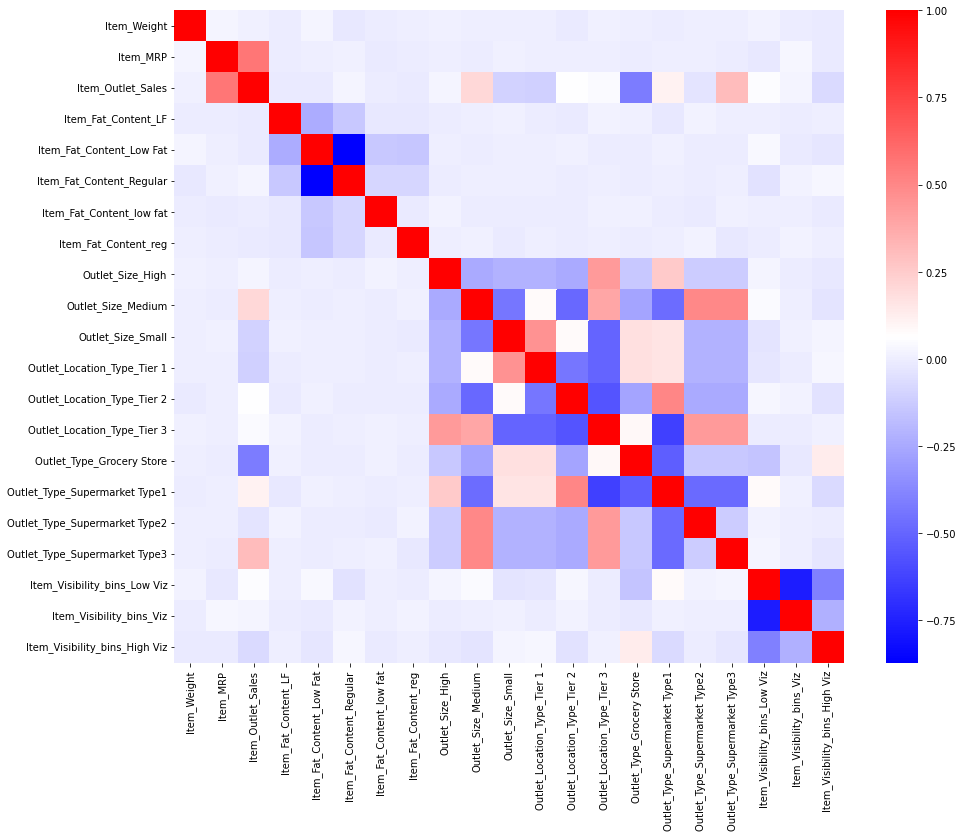

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,12))

correlation = final_train.corr()

sns.heatmap(correlation, cmap='bwr')

In [ ]:
X = final_train.drop('Item_Outlet_Sales', axis=1)
y = final_train['Item_Outlet_Sales']

In [ ]:
X.shape, y.shape

((8523, 20), (8523,))

In [ ]:
dc = dict()
for i in list(final_train.columns):
    dc[i] = i.replace(' ','_')

In [ ]:
dc

{'Item_Fat_Content_LF': 'Item_Fat_Content_LF',
 'Item_Fat_Content_Low Fat': 'Item_Fat_Content_Low_Fat',
 'Item_Fat_Content_Regular': 'Item_Fat_Content_Regular',
 'Item_Fat_Content_low fat': 'Item_Fat_Content_low_fat',
 'Item_Fat_Content_reg': 'Item_Fat_Content_reg',
 'Item_MRP': 'Item_MRP',
 'Item_Outlet_Sales': 'Item_Outlet_Sales',
 'Item_Visibility_bins_High Viz': 'Item_Visibility_bins_High_Viz',
 'Item_Visibility_bins_Low Viz': 'Item_Visibility_bins_Low_Viz',
 'Item_Visibility_bins_Viz': 'Item_Visibility_bins_Viz',
 'Item_Weight': 'Item_Weight',
 'Outlet_Location_Type_Tier 1': 'Outlet_Location_Type_Tier_1',
 'Outlet_Location_Type_Tier 2': 'Outlet_Location_Type_Tier_2',
 'Outlet_Location_Type_Tier 3': 'Outlet_Location_Type_Tier_3',
 'Outlet_Size_High': 'Outlet_Size_High',
 'Outlet_Size_Medium': 'Outlet_Size_Medium',
 'Outlet_Size_Small': 'Outlet_Size_Small',
 'Outlet_Type_Grocery Store': 'Outlet_Type_Grocery_Store',
 'Outlet_Type_Supermarket Type1': 'Outlet_Type_Supermarket_Type1',
 

In [ ]:
train_new = final_train.rename(dc, axis=1)

In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    8523 non-null   float64
 1   Item_MRP                       8523 non-null   float64
 2   Item_Outlet_Sales              8523 non-null   float64
 3   Item_Fat_Content_LF            8523 non-null   uint8  
 4   Item_Fat_Content_Low_Fat       8523 non-null   uint8  
 5   Item_Fat_Content_Regular       8523 non-null   uint8  
 6   Item_Fat_Content_low_fat       8523 non-null   uint8  
 7   Item_Fat_Content_reg           8523 non-null   uint8  
 8   Outlet_Size_High               8523 non-null   uint8  
 9   Outlet_Size_Medium             8523 non-null   uint8  
 10  Outlet_Size_Small              8523 non-null   uint8  
 11  Outlet_Location_Type_Tier_1    8523 non-null   uint8  
 12  Outlet_Location_Type_Tier_2    8523 non-null   u

In [ ]:
'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop('Item_Outlet_Sales', axis=1).columns))

'Item_Outlet_Sales ~ Item_Weight + Item_MRP + Item_Fat_Content_LF + Item_Fat_Content_Low_Fat + Item_Fat_Content_Regular + Item_Fat_Content_low_fat + Item_Fat_Content_reg + Outlet_Size_High + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier_1 + Outlet_Location_Type_Tier_2 + Outlet_Location_Type_Tier_3 + Outlet_Type_Grocery_Store + Outlet_Type_Supermarket_Type1 + Outlet_Type_Supermarket_Type2 + Outlet_Type_Supermarket_Type3 + Item_Visibility_bins_Low_Viz + Item_Visibility_bins_Viz + Item_Visibility_bins_High_Viz'

In [ ]:
formula = 'Item_Outlet_Sales ~ ' + ' + '.join(list(train_new.drop('Item_Outlet_Sales', axis=1).columns))

In [ ]:
print(formula)

Item_Outlet_Sales ~ Item_Weight + Item_MRP + Item_Fat_Content_LF + Item_Fat_Content_Low_Fat + Item_Fat_Content_Regular + Item_Fat_Content_low_fat + Item_Fat_Content_reg + Outlet_Size_High + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier_1 + Outlet_Location_Type_Tier_2 + Outlet_Location_Type_Tier_3 + Outlet_Type_Grocery_Store + Outlet_Type_Supermarket_Type1 + Outlet_Type_Supermarket_Type2 + Outlet_Type_Supermarket_Type3 + Item_Visibility_bins_Low_Viz + Item_Visibility_bins_Viz + Item_Visibility_bins_High_Viz


In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula=formula, data=train_new).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     644.4
Date:                Sun, 27 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:12:34   Log-Likelihood:                -71996.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8505   BIC:                         1.442e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      -166.0730     70.931     -2.341      0.019    -305.114     -27.032
Item_Weight                      -0.3559      2.893     -0.123      0.902      -6.027       5.316
Item_MRP                         15.5532      0.197     79.089      0.000      15.168      15.939
Item_Fat_Content_LF             -66.9833     60.247     -1.112      0.266    -185.082      51.115
Item_Fat_Content_Low_Fat        -38.7249     34.923     -1.109      0.268    -107.182      29.732
Item_Fat_Content_Regular         16.3128     36.356      0.449      0.654     -54.954      87.579
Item_Fat_Content_low_fat          9.1804     91.448      0.100      0.920    -170.079     188.440
Item_Fat_Content_reg            -85.8580     90.146     -0.952      0.341    -262.566      90.850
Outlet_Size_High                 47.1895     86.435      0.546      0.585    -122.244     216.622
Outlet_Size_Medium              224.8751     69.295      3.245      0.001      89.040     360.710
Outlet_Size_Small               126.9344     45.389      2.797      0.005      37.962     215.907
Outlet_Location_Type_Tier_1    -140.3355     50.122     -2.800      0.005    -238.587     -42.084
Outlet_Location_Type_Tier_2       4.0691     43.276      0.094      0.925     -80.762      88.901
Outlet_Location_Type_Tier_3     -29.8065     52.263     -0.570      0.568    -132.255      72.642
Outlet_Type_Grocery_Store     -1651.6967     46.511    -35.512      0.000   -1742.869   -1560.525
Outlet_Type_Supermarket_Type1   242.6167     53.856      4.505      0.000     137.046     348.187
Outlet_Type_Supermarket_Type2  -241.2895     59.052     -4.086      0.000    -357.045    -125.534
Outlet_Type_Supermarket_Type3  1484.2965     59.065     25.130      0.000    1368.515    1600.078
Item_Visibility_bins_Low_Viz     34.1058    105.469      0.323      0.746    -172.640     240.851
Item_Visibility_bins_Viz         32.6558    106.117      0.308      0.758    -175.359     240.671
Item_Visibility_bins_High_Viz     4.7851    108.685      0.044      0.965    -208.264     217.834
==============================================================================
Omnibus:                      965.746   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2312.503
Skew:                           0.669   Prob(JB):                         0.00
Kurtosis:                       5.173   Cond. No.                     2.30e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.87e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainX, testX, trainY, testY = train_test_split(X,y, test_size=0.3)

In [ ]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((5966, 20), (2557, 20), (5966,), (2557,))

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(trainX, trainY)

LinearRegression()

In [ ]:
lm.intercept_

-285.4565846464502

In [ ]:
lm.coef_

array([ 9.64963732e-01,  1.56982526e+01, -3.60572034e+01, -2.80087304e+00,
        4.46007558e+01,  7.44761079e+01, -8.02187873e+01,  7.11155191e+01,
        2.36347056e+02,  1.71035469e+02, -8.08878392e+01,  3.26061442e+01,
        4.82816950e+01, -1.63036528e+03,  3.19242818e+02, -2.16815501e+02,
        1.52793797e+03, -3.18689544e+01, -6.17195173e+01, -3.86554009e+01])

In [ ]:
trainX.columns

Index(['Item_Weight', 'Item_MRP', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Visibility_bins_Low Viz',
       'Item_Visibility_bins_Viz', 'Item_Visibility_bins_High Viz'],
      dtype='object')

In [ ]:
lm.score(trainX, trainY)

0.5690553681116713

In [ ]:
lm.score(testX, testY)

0.5464075571040605

In [ ]:
predicted_y = lm.predict(testX)

In [ ]:
predicted_y

array([ 609.19877892, 1381.1537209 , -646.96747472, ..., 2955.30476952,
       3780.47940558, 1505.8965968 ])

# Dealing with Overfitting if that is the case !!

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge = Ridge()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [ ]:
gscv = GridSearchCV(ridge, param_grid=parameters, cv=3, verbose=2)

In [ ]:
gscv.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}, verbose=2)

In [ ]:
gscv.best_params_['alpha']

1

In [ ]:
gscv.best_score_

0.5608381788382674

In [ ]:
ridge = Ridge(alpha=0.1)

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(trainX, trainY)

Lasso()

In [ ]:
lasso.score(trainX, trainY)

0.5689261636278097

In [ ]:
lasso.score(testX, testY)

0.5468910250905241

In [ ]:
parameters = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]} 

In [ ]:
gscv = GridSearchCV(lasso, param_grid=parameters, cv=3)

In [ ]:
gscv.fit(trainX, trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.108e+06, tolerance: 1.177e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.615e+07, tolerance: 1.155e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001]})

In [ ]:
gscv.best_params_['alpha']

1